Plot the locations of the profiles for the different regions. 

In [5]:
import os
import glob
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [6]:
datadir = "/data/EMODnet/Chemistry/insitu/"
datafilelist = sorted(glob.glob(os.path.join(datadir, "*eutrophication*.nc")))

## Make plot
Define projection

In [7]:
m = Basemap(projection='ortho',lon_0=5.,lat_0=45,resolution='c')

### Simple plot

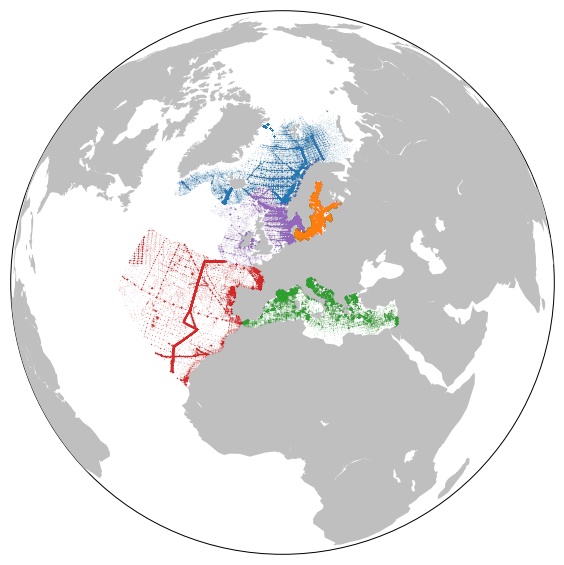

In [8]:
fig = plt.figure(figsize=(10, 10))
for datafile in datafilelist:
    with netCDF4.Dataset(datafile, "r") as nc:
        lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
        lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    m.plot(lon, lat, "o", ms=.03, latlon=True)
m.fillcontinents(color=".75")
plt.show()
plt.close()

### Hexbin plot

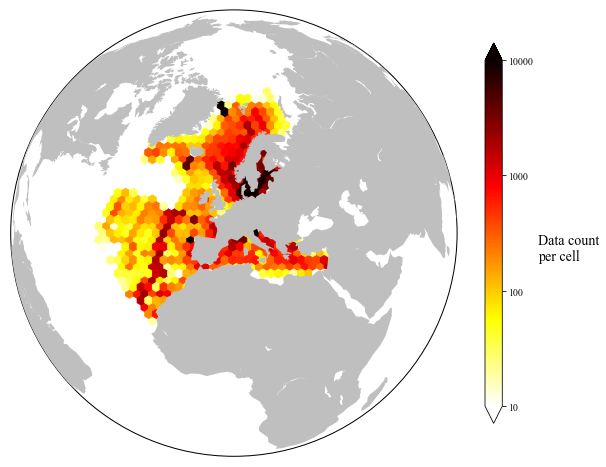

In [17]:
fig = plt.figure(figsize=(10, 10))
lonall = np.array([])
latall = np.array([])
for datafile in datafilelist:
    with netCDF4.Dataset(datafile, "r") as nc:
        lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
        lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    # m.plot(lon, lat, "wo", ms=.03, latlon=True, zorder=4)
    llon, llat = m(lon, lat)
    lonall = np.append(lonall, llon)
    latall = np.append(latall, llat)
    
m.hexbin(lonall, latall, bins="log", vmin=1, vmax=4.,
         mincnt=3, gridsize=30, zorder=3, cmap=plt.cm.hot_r)
m.fillcontinents(color=".75", zorder=5)
cb = plt.colorbar(shrink=.7, extend="both")
cb.set_ticks([1., 2., 3., 4.])
cb.set_ticklabels(["10", "100", "1000", "10000"])
cb.set_label("Data count\nper cell", fontsize=14, rotation=0, ha="left")
plt.show()
plt.close()